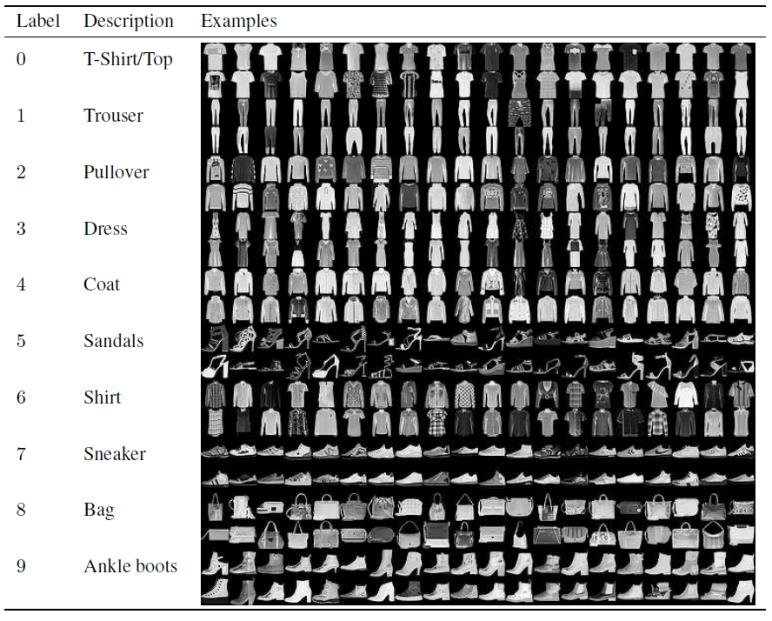

In [59]:
import pandas as pd

In [60]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

In [62]:
import tensorflow

In [63]:
from tensorflow.keras.datasets import fashion_mnist

In [64]:
results = ["T-Shirt",
          "Trouser",
          "Pull-Over",
          "Dress",
          "Coat",
          "Sandals",
          "Shirts",
          "Sneaker",
          "Bag",
          "Ankle Boots"]

In [65]:
results[4]

'Coat'

In [66]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

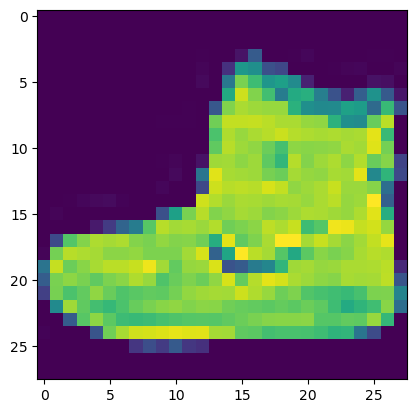

In [69]:
plt.imshow(x_train[0])

In [70]:
y_train[0]

9

In [71]:
results[9]

'Ankle Boots'

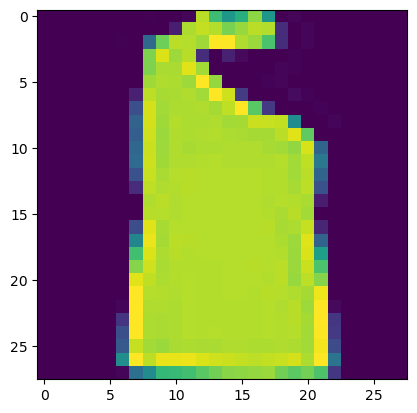

In [72]:
plt.imshow(x_train[2122])

In [73]:
y_test[2122]

7

In [74]:
results[7]

'Sneaker'

### Scale

In [75]:
x_train_scale = x_train/255.0

In [76]:
x_test_scale = x_test/255.0

In [77]:
x_train.max()

255

In [78]:
x_train.min()

0

In [79]:
x_train_scale.max()

1.0

In [80]:
x_train_scale.min()

0.0

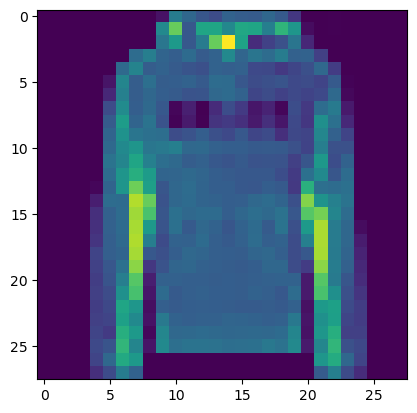

In [81]:
plt.imshow(x_train[2108])

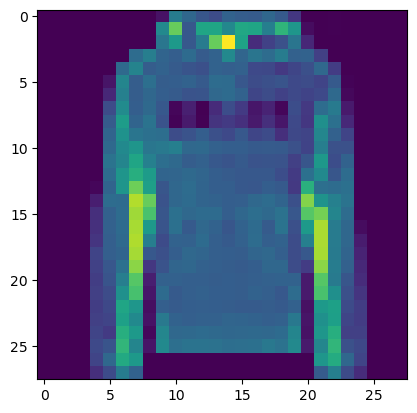

In [82]:
plt.imshow(x_train_scale[2108])

### Functional Model

In [83]:
from tensorflow.keras.models import Model

In [84]:
from tensorflow.keras.layers import Dense,Flatten,Input

In [85]:
inp = Input(shape = (28,28))

In [86]:
flat = Flatten()(inp)

In [87]:
den1 = Dense(256, activation = "relu")(flat)

In [88]:
den2 = Dense(512 , activation = "relu")(den1)

In [89]:
den3 = Dense(256 ,activation = "relu")(den2)

In [90]:
out = Dense(10, activation = "softmax")(den3)

In [91]:
func_model = Model(inputs = inp , outputs = out)

In [92]:
func_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,442 (1.78 MB)

 Trainable params: 466,442 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
func_model.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

In [ ]:
func_model.fit(x_train_scale,y_train,epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7853 - loss: 0.5983
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8638 - loss: 0.3674
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8763 - loss: 0.3318
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8873 - loss: 0.3016
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8920 - loss: 0.2872
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9006 - loss: 0.2656
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9038 - loss: 0.2547
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9077 - loss: 0.2455
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9112 - loss: 0.2318
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9143 - loss: 0.2229
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9165 - loss: 0.2163
Epoch 12/20
1875/18

In [ ]:
func_model.evaluate(x_test_scale,y_test)

### Prediction 1

In [ ]:
x_train_scale[3000]

In [ ]:
x_train_scale[3000].shape

In [ ]:
img1 = x_train_scale[3000].reshape((1,)+x_train_scale[3000].shape)

In [ ]:
img1.shape

In [ ]:
func_model.predict(img1)

In [ ]:
np.argmax(func_model.predict(img1))

In [ ]:
results[6]

In [ ]:
plt.imshow(x_train_scale[3000])

### Prediction 2

In [ ]:
x_test_scale[7000]

In [ ]:
img2 = x_test_scale[7000].reshape((1,)+(28,28))

In [ ]:
x_test_scale[7000].shape

In [ ]:
img2.shape

In [ ]:
func_model.predict(img2)

In [ ]:
np.argmax(func_model.predict(img2))

In [ ]:
results[8]

In [ ]:
plt.imshow(x_test_scale[7000])